In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dataset=pd.read_csv("Advertising.csv")

In [37]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
dataset.shape

(200, 5)

In [39]:
dataset.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [40]:
dataset.duplicated().any()

False

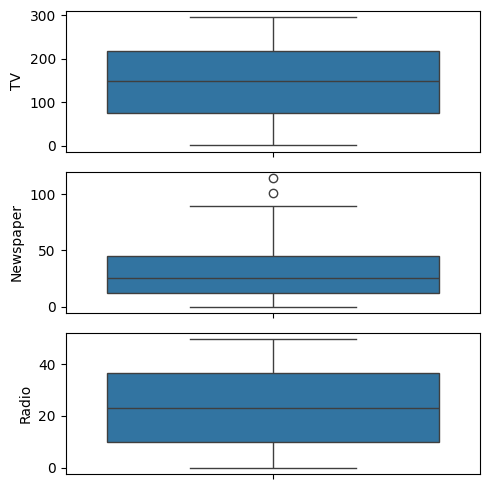

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("Advertising.csv")

fig, axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(dataset['TV'],ax=axs[0])
plt2=sns.boxplot(dataset['Newspaper'],ax=axs[1])
plt3=sns.boxplot(dataset['Radio'],ax=axs[2])
plt.tight_layout()

/tmp/ipykernel_11065/475624845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


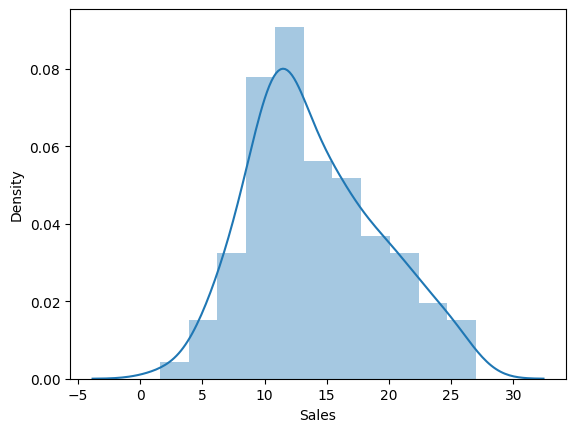

In [42]:
sns.distplot(dataset['Sales']);

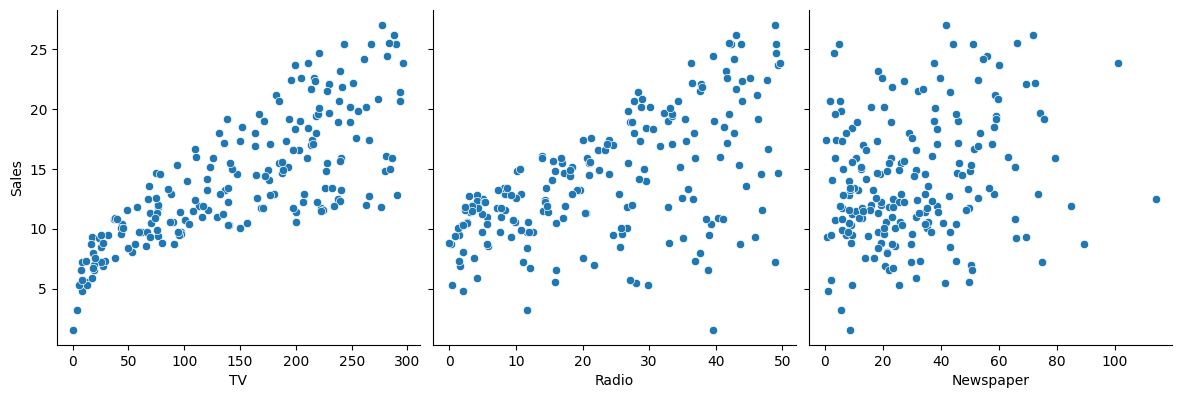

In [43]:
sns.pairplot(dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

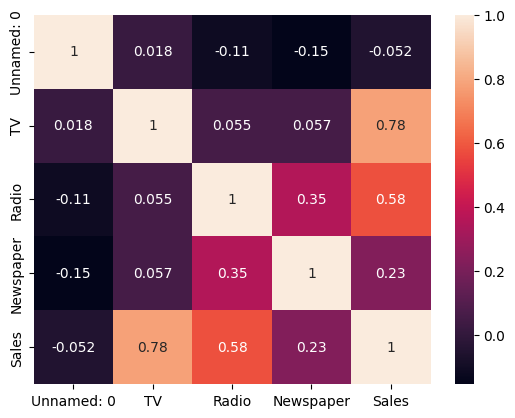

In [44]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x=dataset[['TV']]
y=dataset['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
slr=LinearRegression()
slr.fit(x_train,y_train)
print('Intercept: ',slr.intercept_)
print('Coefficient: ',slr.coef_)

Intercept:  6.98966585741168
Coefficient:  [0.04649736]


In [46]:
print('Regression Equation sales=6.948+0.054*TV')

Regression Equation sales=6.948+0.054*TV


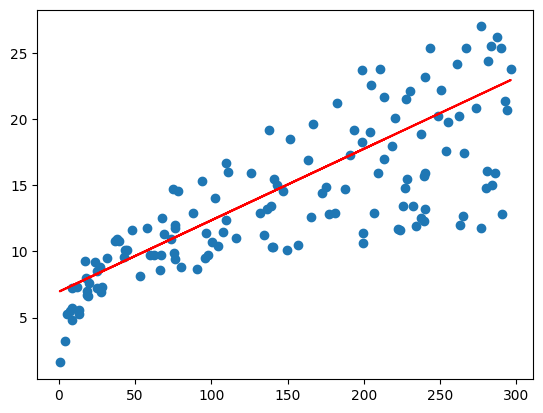

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()

In [49]:
y_pred_slr=slr.predict(x_test)
x_pred_slr=slr.predict(x_train)

print("predication for test set:{}".format(y_pred_slr))

predication for test set:[ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [50]:
slr_diff=pd.DataFrame({'Actual value':y_test,'Predicated Value':y_pred_slr})
slr_diff

,Actual value,Predicated Value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293
